<a href="https://colab.research.google.com/github/magomeda228/Colab_Google_ML_H-W/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zdfvberfew","key":"e7c65bd161c0a2a6514d1895a9ab3875"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle --version

Kaggle API 1.6.17


In [ ]:
!kaggle competitions download -c nyc-taxi-trip-duration

 76% 65.0M/85.8M [00:00<00:00, 220MB/s]
100% 85.8M/85.8M [00:00<00:00, 216MB/s]


In [ ]:
!unzip nyc-taxi-trip-duration.zip

Archive:  nyc-taxi-trip-duration.zip
  inflating: sample_submission.zip   
  inflating: test.zip                
  inflating: train.zip               


In [ ]:
!unzip train.zip

Archive:  train.zip
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train_df = pd.DataFrame(train)

In [ ]:
train_df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [ ]:
train_df = train_df.drop(columns='dropoff_datetime')
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])

In [ ]:
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
Y = train_df['trip_duration']
Y

,trip_duration
0,455
1,663
2,2124
3,429
4,435
...,...
1458639,778
1458640,655
1458641,764
1458642,373


In [ ]:
train_df['trip_duration'].describe()

,trip_duration
count,1.458644e+06
mean,9.594923e+02
std,5.237432e+03
min,1.000000e+00
25%,3.970000e+02
50%,6.620000e+02
75%,1.075000e+03
max,3.526282e+06


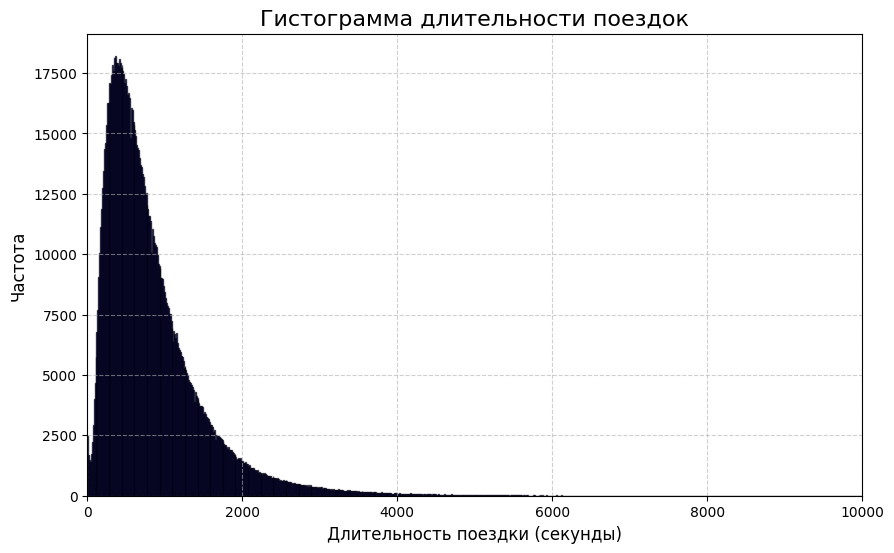

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['trip_duration'], bins='auto',  color='blue', edgecolor='black', alpha=0.7)
plt.title('Гистограмма длительности поездок', fontsize=16)
plt.xlim(0,1e4)
plt.xlabel('Длительность поездки (секунды)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
train_df['log_trip_duration'] = np.log1p(train_df['trip_duration'])
train_df.drop(columns='trip_duration')

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


In [ ]:
train_df['log_trip_duration'].describe()

,log_trip_duration
count,1.458644e+06
mean,6.466978e+00
std,7.957595e-01
min,6.931472e-01
25%,5.986452e+00
50%,6.496775e+00
75%,6.981006e+00
max,1.507575e+01


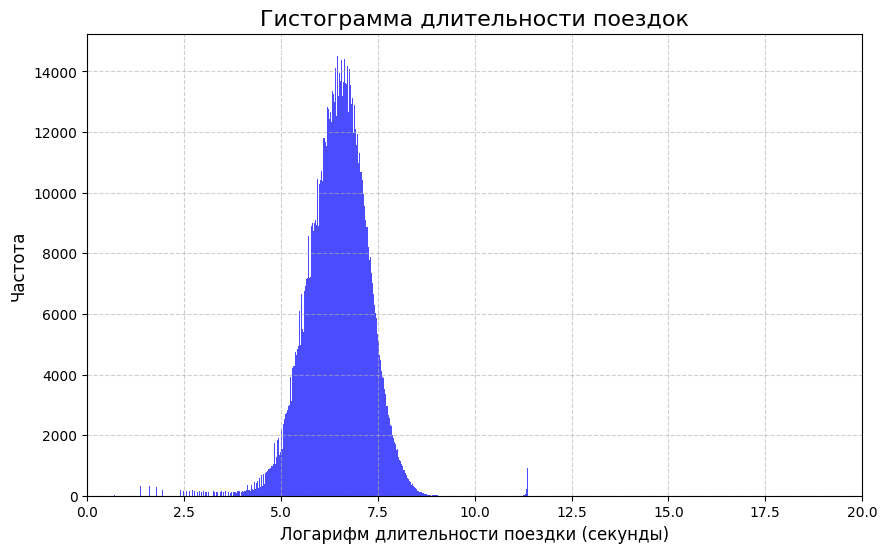

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(train_df['log_trip_duration'], bins='auto', color='blue', alpha=0.7)
plt.xlim(0,20)
plt.title('Гистограмма длительности поездок', fontsize=16)
plt.xlabel('Логарифм длительности поездки (секунды)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
log_mean = train_df['log_trip_duration'].mean()
y_pred_const = np.full_like(train_df['log_trip_duration'], log_mean)
mse_const = mean_squared_error(train_df['log_trip_duration'], y_pred_const)
mse_const

0.6332327625405553

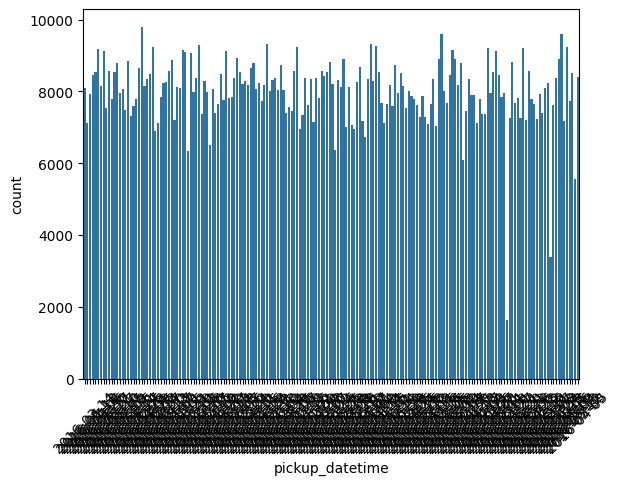

In [ ]:
sns.countplot(x=train_df['pickup_datetime'].dt.date)
plt.xticks(rotation=45)
plt.show()

In [ ]:
train_df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256


In [ ]:
train_df['weekday']=train_df['pickup_datetime'].dt.weekday

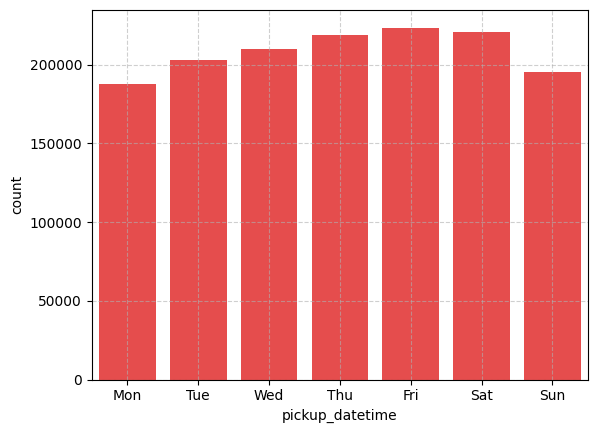

In [ ]:
sns.countplot(x=train_df['pickup_datetime'].dt.weekday, color='red', alpha=0.8)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True, linestyle='--', alpha=0.6)

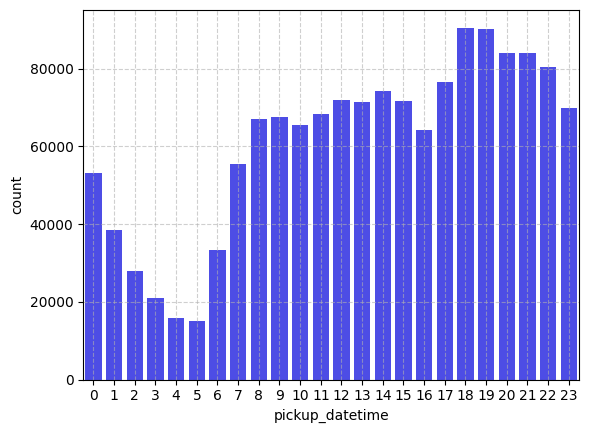

In [ ]:
sns.countplot(x=train_df['pickup_datetime'].dt.hour, color='blue', alpha=0.8)
plt.grid(True, linestyle='--', alpha=0.6)

In [ ]:
train_df['pickup_datetime'].dt.month

,pickup_datetime
0,3
1,6
2,1
3,4
4,3
...,...
1458639,4
1458640,1
1458641,4
1458642,1


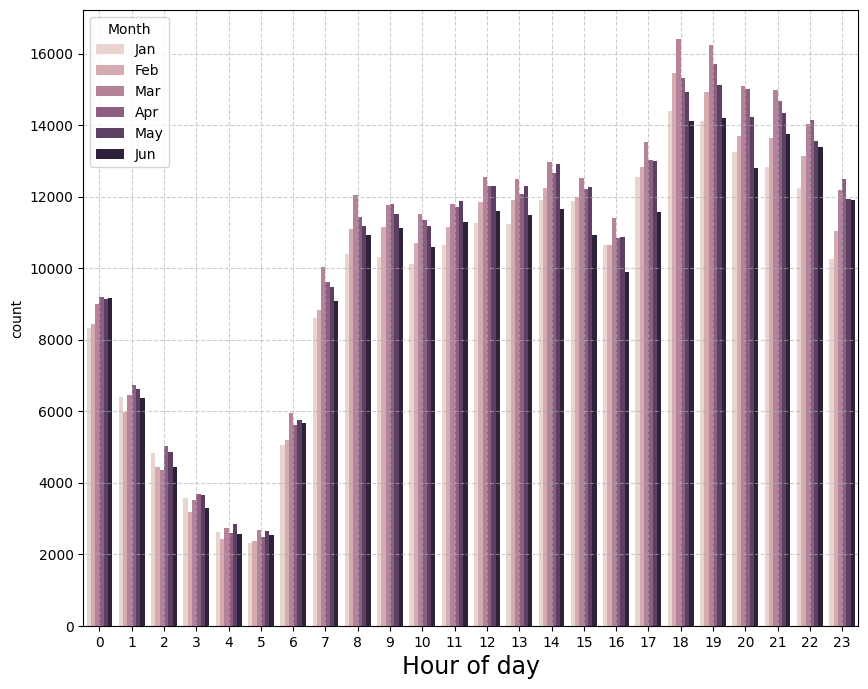

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=train_df['pickup_datetime'].dt.hour, hue=train_df['pickup_datetime'].dt.month, data=train_df)
plt.legend(title='Month', labels=['Jan','Feb','Mar','Apr','May','Jun'])
plt.xlabel('Hour of day',size=17)
plt.grid(True, linestyle='--', alpha=0.6)

Text(0.5, 0, 'Hour of day')

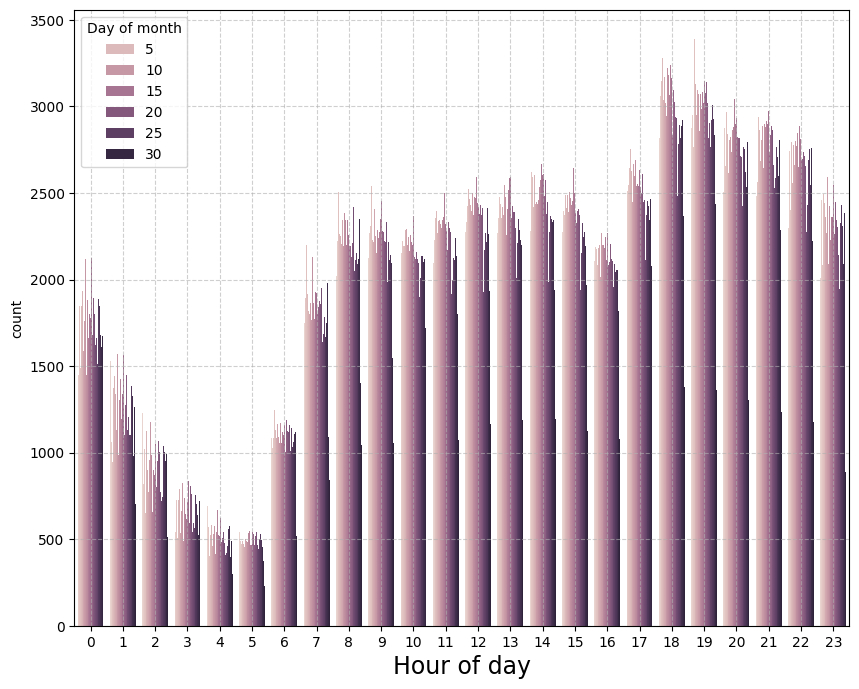

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=train_df['pickup_datetime'].dt.hour,hue=train_df['pickup_datetime'].dt.day)
plt.grid(True,linestyle='--',alpha=0.6)
plt.legend(title='Day of month')
plt.xlabel('Hour of day',size=17)

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(train_df, test_size=0.3)

In [ ]:
#df_train_day = pd.DataFrame()
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['weekday'] =df_train['pickup_datetime'].dt.weekday
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train['day_month'] = df_train['pickup_datetime'].dt.day
df_train['day_year'] = df_train['pickup_datetime'].dt.dayofyear
df_train['trip_duration'] = df_train['trip_duration']

In [ ]:
df_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,weekday,hour,day_month,day_year
479017,id1379442,2,2016-02-29 09:18:36,1,-73.953720,40.785141,-73.993042,40.741451,N,1908,7.554335,0,9,29,60
336588,id0222234,2,2016-01-05 19:09:16,1,-73.968941,40.754040,-73.998825,40.744663,N,988,6.896694,1,19,5,5
67759,id0641255,2,2016-04-27 19:00:37,1,-73.991379,40.749870,-73.998390,40.732422,N,549,6.309918,2,19,27,118
1415361,id3425634,1,2016-02-15 20:26:13,1,-74.005081,40.746498,-73.994675,40.750290,N,252,5.533389,0,20,15,46
1263454,id2559291,1,2016-05-16 15:06:16,1,-73.983101,40.767799,-73.999977,40.754948,N,1499,7.313220,0,15,16,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412705,id3594662,2,2016-01-14 15:40:15,1,-73.979485,40.761616,-73.994522,40.740532,N,867,6.766192,3,15,14,14
280974,id1573714,2,2016-04-22 01:24:35,1,-74.009171,40.738098,-73.991386,40.735149,N,452,6.115892,4,1,22,113
1073484,id0099792,2,2016-03-24 20:31:55,1,-73.993027,40.742031,-73.976044,40.730282,N,762,6.637258,3,20,24,84
431030,id1389122,1,2016-02-09 11:09:11,1,-73.975815,40.757877,-73.976173,40.762882,N,1210,7.099202,1,11,9,40


In [ ]:
df_train.groupby('weekday')['trip_duration'].mean()
df_train.groupby('hour')['trip_duration'].mean()


,trip_duration
hour,
0,908.497924
1,905.210228
2,902.084717
3,880.826642
4,953.381808
5,842.797751
6,816.293652
7,827.648105
8,926.688301


In [ ]:
df_train.index

Index([ 863497,  994640,  890378,  561269, 1379076, 1151455, 1041889,  389148,
        362678, 1215391,
       ...
         27143,  169637,  463618, 1348958, 1057569,  966309,  906210, 1066820,
        481854, 1336136],
      dtype='int64', length=1021050)

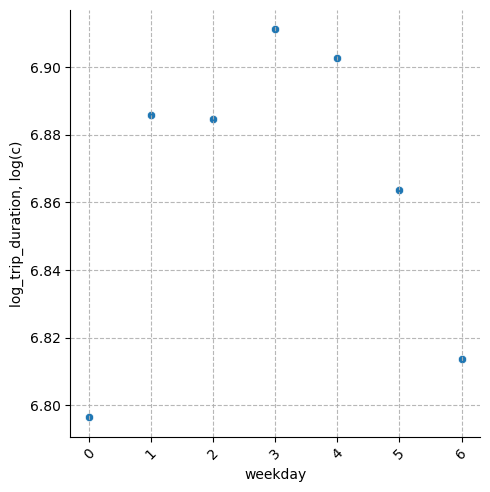

In [ ]:
sns.relplot(x=df_train.groupby('weekday')['trip_duration'].mean().index, y=np.log(df_train.groupby('weekday')['trip_duration'].mean()))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha =0.9)
plt.ylabel('log_trip_duration, log(c)')
plt.show()

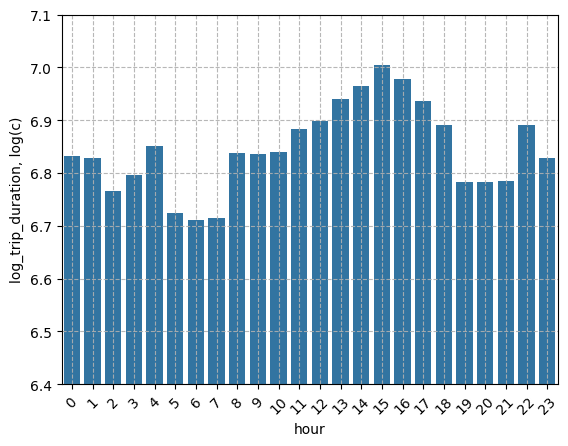

In [ ]:
sns.barplot(x=df_train.groupby('hour')['trip_duration'].mean().index, y=np.log(df_train.groupby('hour')['trip_duration'].mean()))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha =0.9)
plt.ylabel('log_trip_duration, log(c)')
plt.ylim(6.4,7.1)
plt.show()

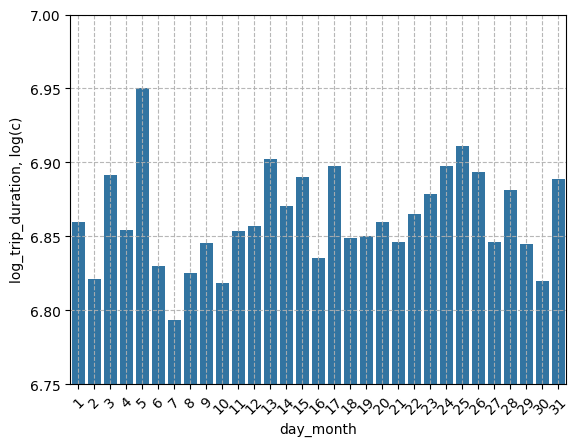

In [ ]:
sns.barplot(x=df_train.groupby('day_month')['trip_duration'].mean().index, y=np.log(df_train.groupby('day_month')['trip_duration'].mean()))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha =0.9)
plt.ylabel('log_trip_duration, log(c)')
plt.ylim(6.75,7.0)
plt.show()

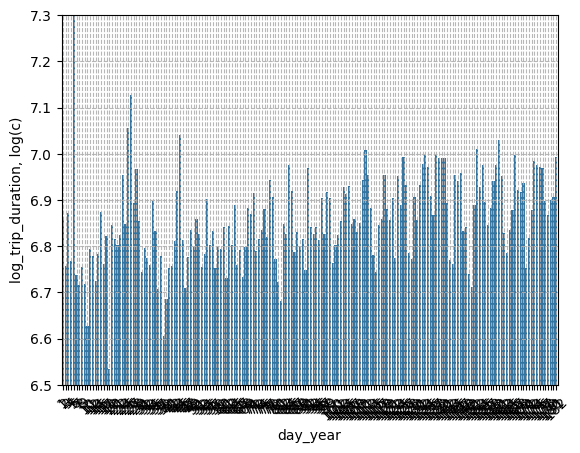

In [ ]:
sns.barplot(x=df_train.groupby('day_year')['trip_duration'].mean().index, y=np.log(df_train.groupby('day_year')['trip_duration'].mean()))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha =0.9)
plt.ylabel('log_trip_duration, log(c)')
plt.ylim(6.5,7.3)
plt.show()

In [ ]:
numeric_features = ['hour','day_year','day_month','weekday']
unumeric_features = df_train.select_dtypes([object]).columns

In [ ]:
df_train[numeric_features].isna().sum()

,0
hour,0
day_year,0
day_month,0
weekday,0


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

scaler = StandardScaler()
X_train = df_train[numeric_features + unumeric_features.tolist()]
Y_train = df_train['trip_duration']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, unumeric_features)
    ])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
model.fit(X_train, Y_train)
print(f"R^2 на обучающих данных: {model.score(X_train, Y_train):.4f}")

R^2 на обучающих данных: 0.7500


In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [ ]:
show_circles_on_map(df_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(df_train.sample(100), "dropoff_latitude", "dropoff_longitude", "blue")

In [ ]:
!pip install haversine
from haversine import haversine

In [ ]:
df_train['haversine'] = train_df.apply(lambda row: haversine(
    (row['pickup_latitude'],row['pickup_longitude']),
    (row['dropoff_latitude'],row['dropoff_longitude'])
  ), axis=1
)

In [ ]:
df_train['log_haversine'] = np.log(df_train['haversine'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
imputer = SimpleImputer(strategy='mean')
df_train['log_haversine'] = df_train['log_haversine'].replace([np.inf, -np.inf], np.nan)
df_train['log_haversine'] = imputer.fit_transform(df_train[['log_haversine']])

In [ ]:
from sklearn.metrics import mean_squared_error
log_mean = df_train['log_haversine'].mean()
y_pred_const = np.full_like(df_train['log_haversine'], log_mean)
mse_const = mean_squared_error(df_train['log_haversine'], y_pred_const)
mse_const

0.9014722766100388

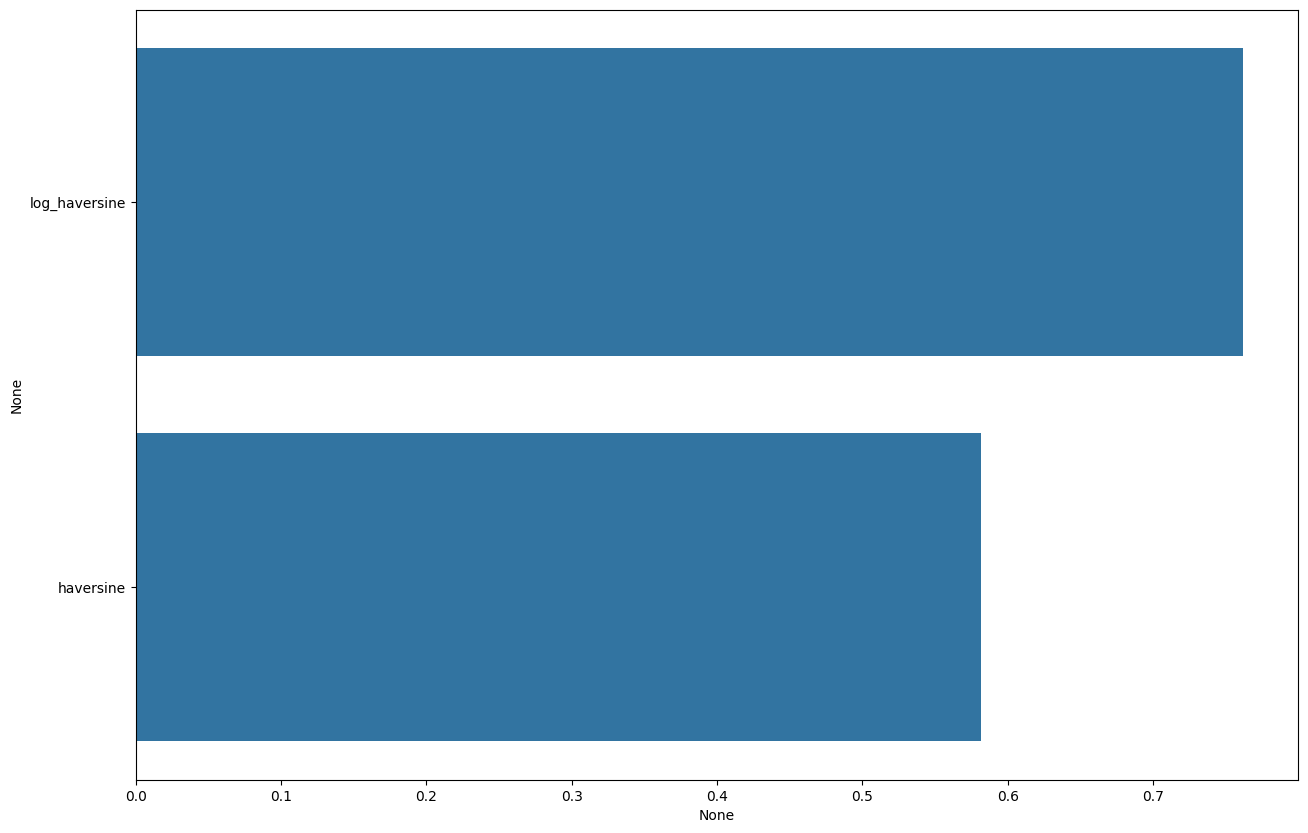

In [ ]:
corr = df_train[['log_haversine','haversine']].corrwith(train_df['log_trip_duration']).sort_values(ascending=False)
plot = sns.barplot(y=corr.index, x=corr)
plot.figure.set_size_inches(15,10)

In [ ]:
df_train['avg_speed'] = df_train['haversine']/df_train['trip_duration']

In [ ]:
df_train['avg_speed'].describe()

,avg_speed
count,1.021050e+06
mean,4.008525e-03
std,4.654491e-03
min,0.000000e+00
25%,2.533278e-03
50%,3.553741e-03
75%,4.957592e-03
max,2.576347e+00


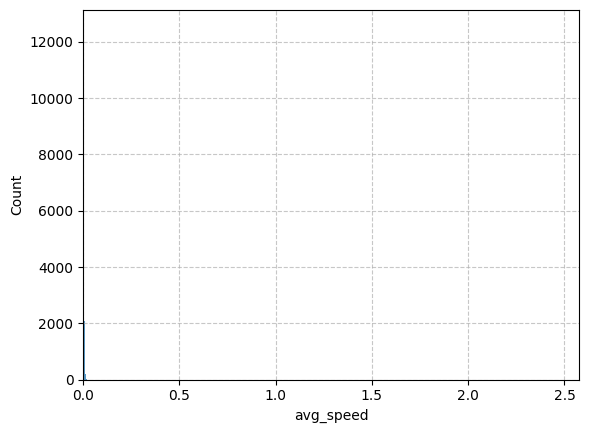

In [ ]:
sns.histplot(df_train['avg_speed'])
plt.xlim(df_train['avg_speed'].min(),df_train['avg_speed'].max())
plt.grid(True,linestyle='--',alpha=0.7)

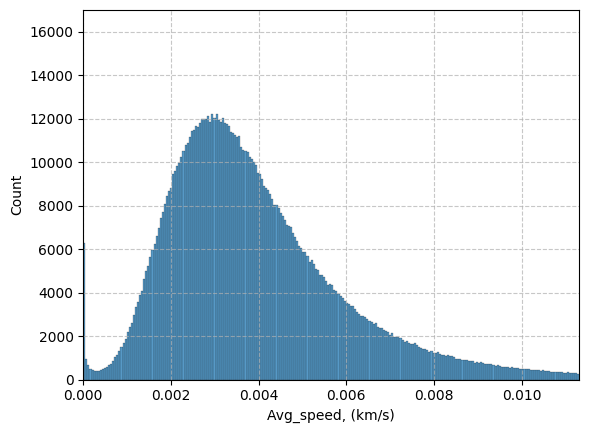

In [ ]:
sns.histplot(df_train[df_train['avg_speed'] <= df_train['avg_speed'].quantile(0.99)]['avg_speed'])
plt.xlim(df_train['avg_speed'].min(),df_train['avg_speed'].quantile(0.99))
plt.ylim(0,1.7e4)
plt.xlabel('Avg_speed, (km/s)')
plt.grid(True,linestyle='--',alpha=0.7)

In [ ]:
df_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,weekday,hour,day_month,day_year,haversine,log_haversine,avg_speed
479017,id1379442,2,2016-02-29 09:18:36,1,-73.953720,40.785141,-73.993042,40.741451,N,1908,7.554335,0,9,29,60,5.879492,1.771470,0.003081
336588,id0222234,2,2016-01-05 19:09:16,1,-73.968941,40.754040,-73.998825,40.744663,N,988,6.896694,1,19,5,5,2.724775,1.002386,0.002758
67759,id0641255,2,2016-04-27 19:00:37,1,-73.991379,40.749870,-73.998390,40.732422,N,549,6.309918,2,19,27,118,2.028109,0.707104,0.003694
1415361,id3425634,1,2016-02-15 20:26:13,1,-74.005081,40.746498,-73.994675,40.750290,N,252,5.533389,0,20,15,46,0.972762,-0.027615,0.003860
1263454,id2559291,1,2016-05-16 15:06:16,1,-73.983101,40.767799,-73.999977,40.754948,N,1499,7.313220,0,15,16,137,2.015555,0.700895,0.001345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412705,id3594662,2,2016-01-14 15:40:15,1,-73.979485,40.761616,-73.994522,40.740532,N,867,6.766192,3,15,14,14,2.664739,0.980106,0.003074
280974,id1573714,2,2016-04-22 01:24:35,1,-74.009171,40.738098,-73.991386,40.735149,N,452,6.115892,4,1,22,113,1.533847,0.427779,0.003393
1073484,id0099792,2,2016-03-24 20:31:55,1,-73.993027,40.742031,-73.976044,40.730282,N,762,6.637258,3,20,24,84,1.937610,0.661455,0.002543
431030,id1389122,1,2016-02-09 11:09:11,1,-73.975815,40.757877,-73.976173,40.762882,N,1210,7.099202,1,11,9,40,0.557337,-0.584585,0.000461


<Axes: xlabel='hour', ylabel='weekday'>

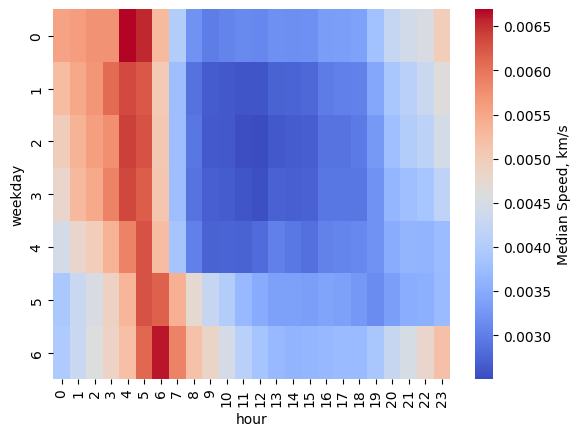

In [ ]:
df_train_grouped = df_train.groupby(['hour','weekday'])['avg_speed'].median().reset_index()
df_pivot = df_train_grouped.pivot(index='weekday', columns='hour', values='avg_speed')
sns.heatmap(df_pivot, annot=False, cmap='coolwarm', cbar_kws={'label': 'Median Speed, km/s'})

In [ ]:
df_train['pickup_longitude'].quantile(0.95)

-73.89085311889649

In [ ]:
df_train['Roads_status_free'] = ['Yes' if (hour <= 7) | (hour >= 22) else 'No' for hour in df_train['hour']]


In [ ]:
quanlon_95 = df_train['pickup_longitude'].quantile(0.9999)
quanlon_05 = df_train['pickup_longitude'].quantile(0.0001)
quanlat_95 = df_train['pickup_latitude'].quantile(0.9999)
quanlat_05 = df_train['pickup_latitude'].quantile(0.0001)
df_train['Start'] = 'Normal'

In [ ]:
quanlon_d_95 = df_train['dropoff_longitude'].quantile(0.9999)
quanlon_d_05 = df_train['dropoff_longitude'].quantile(0.0001)
quanlat_d_95 = df_train['dropoff_latitude'].quantile(0.9999)
quanlat_d_05 = df_train['dropoff_latitude'].quantile(0.0001)
df_train['Stop'] = 'Normal'

In [ ]:
df_train.loc[((df_train['pickup_longitude'] >= quanlon_95) | (df_train['pickup_longitude'] <= quanlon_05)) |
             ((df_train['pickup_latitude'] >= quanlat_95) | (df_train['pickup_latitude'] <= quanlat_05)),'Start'] = 'Start'

In [ ]:
df_train.loc[((df_train['dropoff_longitude'] >= quanlon_d_95) | (df_train['dropoff_longitude'] <= quanlon_d_05)) |
             ((df_train['dropoff_latitude'] >= quanlat_d_95) | (df_train['dropoff_latitude'] <= quanlat_d_05)),'Stop'] = 'Stop'

In [ ]:
#df_train = df_train.drop(['Start/stop'],axis=1)

KeyError: "['Start/stop'] not found in axis"

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [ ]:
show_circles_on_map(df_train[df_train['Start'] == 'Start'], "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(df_train[df_train['Stop'] == 'Stop'], "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=4, n_cols=3):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lat_min = 40.7117
        self.lat_max = 40.8155
        self.lon_min = -74.0253
        self.lon_max = -73.9760
        self.lat_step = None
        self.lon_step = None
        pass
    def show_map(self):
        # Создаем карту с начальной позицией
        m = folium.Map(location=[(self.lat_min + self.lat_max) / 2, (self.lon_min + self.lon_max) / 2], zoom_start=12)

        # Строим сетку
        for i in range(self.n_rows + 1):
            for j in range(self.n_cols + 1):
                # Вершины квадратов сетки
                lat1 = self.lat_min + i * self.lat_step
                lon1 = self.lon_min + j * self.lon_step
                lat2 = self.lat_min + (i + 1) * self.lat_step
                lon2 = self.lon_min + (j + 1) * self.lon_step

                # Добавляем прямоугольники на карту
                folium.Polygon(
                    locations=[
                        [lat1, lon1],
                        [lat1, lon2],
                        [lat2, lon2],
                        [lat2, lon1]
                    ],
                    color="blue", weight=1, fill=True, fill_opacity=0.1
                ).add_to(m)

        return m
    def fit(self, X=None, y=None):
        self.lat_min = min(X['pickup_latitude'].min(), X['dropoff_latitude'].min())
        self.lat_max = max(X['pickup_latitude'].max(), X['dropoff_latitude'].max())

        self.lon_min = min(X['pickup_longitude'].min(), X['dropoff_longitude'].min())
        self.lon_max = max(X['pickup_longitude'].max(), X['dropoff_longitude'].max())

        self.lat_step = (self.lat_max - self.lat_max) / self.n_rows
        self.lon_step = (self.lon_max - self.lon_max) / self.n_cols
        return self

    def transform(self, X):
        # Преобразуем координаты в номера ячеек
        pickup_lat_cells = np.floor((X['pickup_latitude'] - self.lat_min) / self.lat_step)
        pickup_lon_cells = np.floor((X['pickup_longitude'] - self.lon_min) / self.lon_step)

        dropoff_lat_cells = np.floor((X['dropoff_latitude'] - self.lat_min) / self.lat_step)
        dropoff_lon_cells = np.floor((X['dropoff_longitude'] - self.lon_min) / self.lon_step)

        # Обрабатываем возможные значения за пределами области
        pickup_lat_cells = np.clip(pickup_lat_cells, 0, self.n_rows - 1)
        pickup_lon_cells = np.clip(pickup_lon_cells, 0, self.n_cols - 1)

        dropoff_lat_cells = np.clip(dropoff_lat_cells, 0, self.n_rows - 1)
        dropoff_lon_cells = np.clip(dropoff_lon_cells, 0, self.n_cols - 1)

        # Генерируем номера ячеек
        pickup_cell_numbers = pickup_lat_cells * self.n_cols + pickup_lon_cells
        dropoff_cell_numbers = dropoff_lat_cells * self.n_cols + dropoff_lon_cells

        # Создаем DataFrame с результатами
        X_transformed = X.copy()
        X_transformed['pickup_cell'] = pickup_cell_numbers
        X_transformed['dropoff_cell'] = dropoff_cell_numbers

        return X_transformed


In [ ]:
df_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,weekday,hour,day_month,day_year
1310145,id0409654,1,2016-05-27 21:56:58,2,-73.992035,40.729027,-73.965530,40.757973,N,769,6.646391,4,21,27,148
246412,id0323527,2,2016-01-18 21:57:40,5,-73.987038,40.739326,-73.996864,40.723286,N,761,6.635947,0,21,18,18
1386469,id3128429,1,2016-06-09 08:29:02,2,-73.986313,40.760433,-73.871178,40.774216,N,2010,7.606387,3,8,9,161
953882,id3347878,2,2016-02-12 20:54:14,1,-73.984657,40.760403,-73.993538,40.752338,N,486,6.188264,4,20,12,43
325230,id3179883,2,2016-06-09 07:44:19,1,-73.974709,40.756199,-73.861877,40.768410,N,1500,7.313887,3,7,9,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046792,id2103473,2,2016-02-24 21:16:26,1,-73.976601,40.763020,-73.978783,40.747639,N,621,6.432940,2,21,24,55
825342,id1586663,2,2016-04-02 20:28:59,3,-73.980957,40.781616,-73.953918,40.770569,N,619,6.429719,5,20,2,93
1242234,id2124736,2,2016-03-15 14:05:58,6,-73.996712,40.737431,-73.975563,40.746441,N,915,6.820016,1,14,15,75
592095,id2460798,2,2016-03-28 12:06:11,5,-74.000992,40.721142,-73.975395,40.756359,N,1091,6.995766,0,12,28,88


**ISSUE: Show Map Algorithm and Classification of Points in Grid!!!!**

In [ ]:
quanlon_95 = df_train['pickup_longitude'].quantile(0.999999)
quanlon_05 = df_train['pickup_longitude'].quantile(0.0001)
quanlat_95 = df_train['pickup_latitude'].quantile(0.999999)
quanlat_05 = df_train['pickup_latitude'].quantile(0.0001)

In [ ]:
quanlon_d_95 = df_train['dropoff_longitude'].quantile(0.999999)
quanlon_d_05 = df_train['dropoff_longitude'].quantile(0.0001)
quanlat_d_95 = df_train['dropoff_latitude'].quantile(0.999999)
quanlat_d_05 = df_train['dropoff_latitude'].quantile(0.0001)

In [ ]:
df2 = df_train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']][
    ((df_train['pickup_longitude'] <= quanlon_95))
    & ((df_train['pickup_latitude'] <= quanlat_95))
    & (df_train['dropoff_longitude'] <= quanlon_d_95)
    & (df_train['dropoff_latitude'] <= quanlat_d_95)
].sample(1000)

In [ ]:
show_circles_on_map(df2, "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
transform = MapGridTransformer()
transform.fit(df2)
transform.transform(df2).sort_values('pickup_cell')
transform.show_map()

In [ ]:
df_train['vendor_id'].unique()

array([2, 1])

In [ ]:
df_train['passenger_count'].unique()

array([1, 4, 2, 3, 5, 6, 0, 9, 8, 7])

In [ ]:
df_train['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

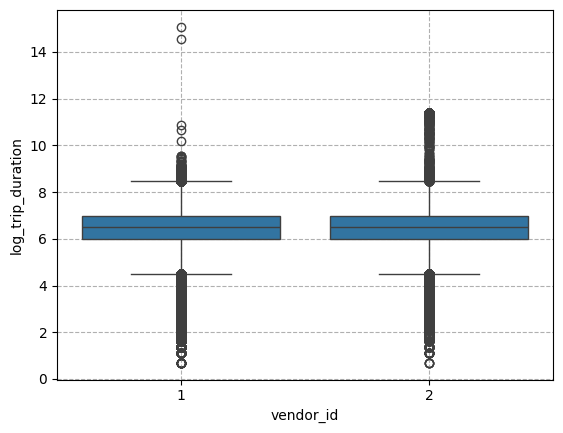

In [ ]:
sns.boxplot(x=train_df['vendor_id'],y=df_train['log_trip_duration'])
plt.grid(True, linestyle='--', alpha=1.0)

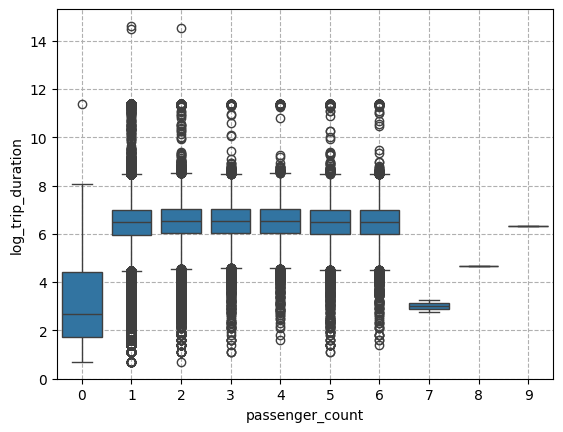

In [ ]:
sns.boxplot(x=df_train['passenger_count'],y=df_train['log_trip_duration'])
plt.grid(True, linestyle='--', alpha=1.0)

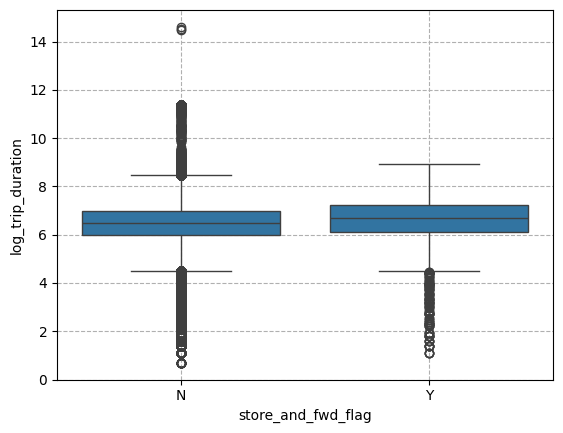

In [ ]:
sns.boxplot(x=df_train['store_and_fwd_flag'],y=df_train['log_trip_duration'])
plt.grid(True, linestyle='--', alpha=1.0)

In [ ]:
df_train['Roads_status_free'] = ['Yes' if (hour <= 7) | (hour >= 22) else 'No' for hour in df_train['hour']]

In [ ]:
df_train['vendor_id'] = [0 if (vendor_id == 1) else 1  for vendor_id in df_train['vendor_id']]
df_train['store_and_fwd_flag'] = [0 if (store_and_fwd_flag == 'N') else 1  for store_and_fwd_flag in df_train['store_and_fwd_flag']]
df_train['store_and_fwd_flag'].unique()
#print(f"df_train.shape:{df_train.shape}, encoded_df.shape:{encoded_df.shape}")

array([0, 1])

In [ ]:
df_train['passenger_count'].unique()

array([1, 2, 3, 4, 5, 6, 0, 8, 7, 9])

In [ ]:
numeric_features = ['hour','day_year','day_month','weekday','passenger_count']
unumeric_features = ['id','store_and_fwd_flag', 'vendor_id']

scaler = StandardScaler()
X_train = df_train[numeric_features + unumeric_features]
Y_train = df_train['trip_duration']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, unumeric_features)
    ])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
model.fit(X_train, Y_train)
print(f"R^2 на обучающих данных: {model.score(X_train, Y_train):.4f}")


R^2 на обучающих данных: 0.7501


Улучшение не принесло, признаки можно выкинуть 'passenger_count', 'vendor_id', 'store_and_fwd_flag'

In [ ]:
df_train['Stop'].unique()

array(['Normal', 'Stop'], dtype=object)

In [ ]:
df_train = df_train.drop(['passenger_count','vendor_id','store_and_fwd_flag'], axis=1)

We will discard what is unnecessary and stands out too much from the general sample, obvious errors

In [ ]:
df_train

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,weekday,hour,day_month,day_year,haversine,log_haversine,avg_speed,Roads_status_free,Start,Stop
1270170,id1949141,2016-06-07 21:09:24,-73.968521,40.761387,-73.981789,40.783661,1030,6.938284,1,21,7,159,2.717090,0.999562,0.002638,No,Normal,Normal
1220123,id2979837,2016-03-25 17:07:49,-73.951256,40.778641,-73.995369,40.721699,1451,7.280697,4,17,25,85,7.341558,1.993551,0.005060,No,Normal,Normal
955323,id3468885,2016-05-22 00:15:18,-73.969009,40.766697,-73.986977,40.748959,618,6.428105,6,0,22,143,2.486084,0.910709,0.004023,Yes,Normal,Normal
43896,id1043179,2016-02-23 22:04:38,-73.963058,40.758522,-73.981598,40.766148,634,6.453625,1,22,23,54,1.776803,0.574816,0.002803,Yes,Normal,Normal
190393,id3997616,2016-06-17 18:40:21,-73.966408,40.770557,-73.990601,40.755299,1807,7.499977,4,18,17,169,2.651488,0.975121,0.001467,No,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355146,id1352005,2016-03-14 08:51:23,-73.964447,40.770573,-73.947906,40.778816,555,6.320768,0,8,14,74,1.667384,0.511256,0.003004,No,Normal,Normal
939717,id2579446,2016-02-06 00:05:34,-73.953239,40.775700,-73.959854,40.808495,1094,6.998510,5,0,6,37,3.688909,1.305331,0.003372,Yes,Normal,Normal
324530,id1214520,2016-02-26 23:16:34,-73.978210,40.729519,-73.927429,40.737900,1543,7.342132,4,23,26,57,4.379043,1.476830,0.002838,Yes,Normal,Normal
407674,id0108987,2016-04-03 16:41:03,-74.000313,40.737827,-73.994911,40.743843,428,6.061457,6,16,3,94,0.809048,-0.211897,0.001890,No,Normal,Normal


In [ ]:
df_train = df_train[(df_train['trip_duration'] <= df_train['trip_duration'].quantile(0.99)) &
             (df_train['trip_duration'] >= df_train['trip_duration'].quantile(0.005))]

df_train = df_train[(df_train['haversine'] <= df_train['haversine'].quantile(0.99)) &
              (df_train['haversine'] >= df_train['haversine'].quantile(0.005))]


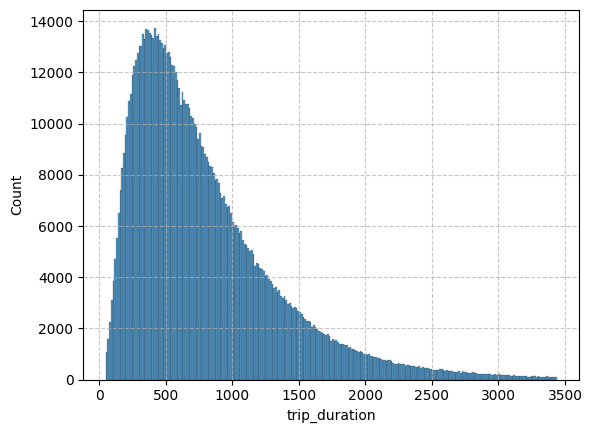

In [ ]:
sns.histplot(df_train['trip_duration'])
plt.grid(True, linestyle='--', alpha=0.7)

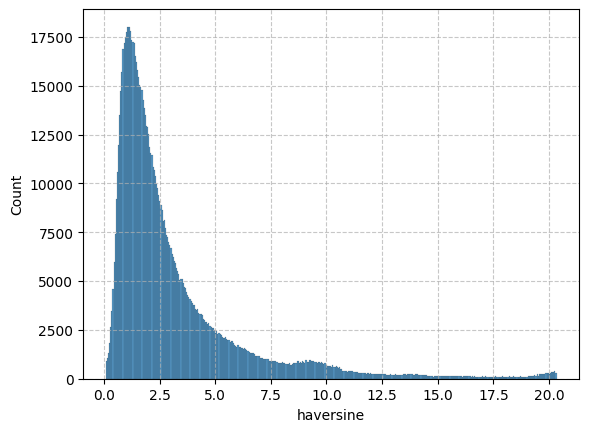

In [ ]:
sns.histplot(df_train['haversine'])
plt.grid(True, linestyle='--', alpha=0.7)

In [ ]:

#unumeratir_features = df_train.select_dtypes([object]).columns
df_train.drop(['id'],axis=1,inplace=True)
df_2 = df_train

In [ ]:
df_2 = df_train
df_2

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,weekday,hour,day_month,day_year,haversine,log_haversine,avg_speed,Roads_status_free,Start,Stop
985709,id2407361,0,2016-02-02 17:20:54,1,-73.862740,40.768932,-73.971779,40.756123,0,1892,...,1,17,2,33,9.293273,2.229291,0.004912,No,Normal,Normal
1100085,id0448305,1,2016-01-30 02:26:20,1,-74.002708,40.718620,-74.004410,40.742191,0,710,...,5,2,30,30,2.624899,0.965042,0.003697,Yes,Normal,Normal
692711,id1069460,0,2016-04-06 14:52:01,1,-73.989357,40.748138,-73.982750,40.756989,0,340,...,2,14,6,97,1.130560,0.122713,0.003325,No,Normal,Normal
1244725,id1503783,1,2016-02-27 16:30:22,5,-73.963722,40.775391,-73.969833,40.756588,0,969,...,5,16,27,58,2.153175,0.766943,0.002222,No,Normal,Normal
1226243,id3179311,1,2016-01-20 13:36:11,3,-73.989311,40.773201,-73.958847,40.773941,0,934,...,2,13,20,20,2.566635,0.942596,0.002748,No,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202318,id3749631,0,2016-03-23 09:50:06,1,-73.947548,40.771187,-73.987602,40.735630,0,916,...,2,9,23,83,5.197623,1.648201,0.005674,No,Normal,Normal
31329,id1586068,0,2016-04-02 23:07:10,1,-73.863617,40.770012,-73.989792,40.719635,0,1378,...,5,23,2,93,12.015182,2.486171,0.008719,Yes,Normal,Normal
326655,id0465977,1,2016-06-01 21:30:02,6,-74.002068,40.719181,-73.993317,40.721951,0,464,...,2,21,1,153,0.799195,-0.224150,0.001722,No,Normal,Normal
854059,id2974487,0,2016-04-03 15:14:56,2,-73.967094,40.793205,-73.986320,40.776958,0,507,...,6,15,3,94,2.425668,0.886107,0.004784,No,Normal,Normal


In [ ]:
rare_cat = ['Roads_status_free', 'Start', 'Stop']
df_2.replace(rare_cat, 'Other')

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,weekday,hour,day_month,day_year,haversine,log_haversine,avg_speed,Roads_status_free,Start,Stop
1270170,2016-06-07 21:09:24,-73.968521,40.761387,-73.981789,40.783661,1030,6.938284,1,21,7,159,2.717090,0.999562,0.002638,No,Normal,Normal
1220123,2016-03-25 17:07:49,-73.951256,40.778641,-73.995369,40.721699,1451,7.280697,4,17,25,85,7.341558,1.993551,0.005060,No,Normal,Normal
955323,2016-05-22 00:15:18,-73.969009,40.766697,-73.986977,40.748959,618,6.428105,6,0,22,143,2.486084,0.910709,0.004023,Yes,Normal,Normal
43896,2016-02-23 22:04:38,-73.963058,40.758522,-73.981598,40.766148,634,6.453625,1,22,23,54,1.776803,0.574816,0.002803,Yes,Normal,Normal
190393,2016-06-17 18:40:21,-73.966408,40.770557,-73.990601,40.755299,1807,7.499977,4,18,17,169,2.651488,0.975121,0.001467,No,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355146,2016-03-14 08:51:23,-73.964447,40.770573,-73.947906,40.778816,555,6.320768,0,8,14,74,1.667384,0.511256,0.003004,No,Normal,Normal
939717,2016-02-06 00:05:34,-73.953239,40.775700,-73.959854,40.808495,1094,6.998510,5,0,6,37,3.688909,1.305331,0.003372,Yes,Normal,Normal
324530,2016-02-26 23:16:34,-73.978210,40.729519,-73.927429,40.737900,1543,7.342132,4,23,26,57,4.379043,1.476830,0.002838,Yes,Normal,Normal
407674,2016-04-03 16:41:03,-74.000313,40.737827,-73.994911,40.743843,428,6.061457,6,16,3,94,0.809048,-0.211897,0.001890,No,Normal,Normal


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
numeric_features = ['hour','day_year','day_month','weekday']
unumeric_features = ['id','Roads_status_free', 'Start', 'Stop']

scaler = StandardScaler()
X_train = df_train[numeric_features + unumeric_features]
Y_train = df_train['trip_duration']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, unumeric_features)
    ])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])
model.fit(X_train, Y_train)
print(f"R^2 на обучающих данных: {model.score(X_train, Y_train):.4f}")

R^2 на обучающих данных: 0.7523


**After removing the outlier data that falls outside reasonable limits, the coefficient of determination improved.**

In [ ]:
model2.fit(X_train, Y_train)
print(f"R^2 на обучающих данных: {model2.score(X_train, Y_train):.4f}")

NameError: name 'mode2' is not defined